## Compare assignment algorithms

In [34]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.insert(0, '..')
from sim.Environment import Environment
from sim.LoadBalancer import LoadBalancer, LoadBalancerShortestQueue
from sim.LoadBalancerRandom import LoadBalancerRandom
from sim.Source import Source, ArrivalSchedule, BatchedSource, ExponentialSource
from scipy.stats import beta

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
sns.set()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [19]:
#config
stopTime = 12*60*60
requestTypes = [(0.5,1,0.1,10), (0.5,2,0.2,10)] #(prob, mu, sigma, cancelTime)
arrivalsPerSecond = 20

In [40]:
def waitingTimeCI(env):
    plt.hist(env.log['requestWaitingTime'])
    print(np.mean(env.log['requestWaitingTime']))
    mean = np.mean(env.log['requestWaitingTime'])
    print(np.std(env.log['requestWaitingTime']))
    se = np.std(env.log['requestWaitingTime'])/np.sqrt(len(env.log['requestWaitingTime']))
    print("mean: ", mean, "95% ci for the waitingTime: ", (mean-1.96*se, mean+1.96*se), "Number of samples: ", len(env.log['requestWaitingTime'])) 


def pCancelledCI(env):
    k = len(env.log['requestCancelled'])
    n = len(env.log['arrivalEvent'])
    alpha = 0.05
    p_u, p_o = beta.ppf([alpha/2, 1 - alpha/2], [k, k + 1], [n - k + 1, n - k])
    print("p(cancelled) ", k/n ,"95% ci for the p(cancelled) ", (p_u,p_o), "Number of samples: ", len(env.log['requestCancelled'])) 



4.049266687672799
2.705797668497012
mean:  4.049266687672799 95% ci for the waitingTime:  (4.043560417483711, 4.054972957861887) Number of samples:  863770
p(cancelled)  0.06660353791140289 95% ci for the p(cancelled)  (0.06607862275791719, 0.0671313614903821) Number of samples:  57535


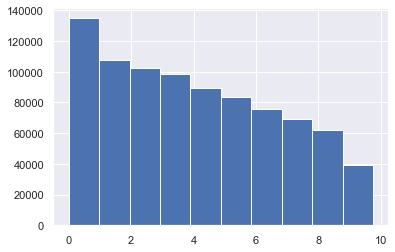

In [41]:
# Round robin
env = Environment(stopTime=stopTime)
loadBalancer = LoadBalancer(nServers=10, environment=env) #roundrobin
source = Source(arrivalsPerSecond, requestTypes, loadBalancer, env)
env.run(debug=False, showProgress=False)
waitingTimeCI(env)
pCancelledCI(env)

4.653424984407925
2.952143837108573
mean:  4.653424984407925 95% ci for the waitingTime:  (4.647198995334953, 4.659650973480898) Number of samples:  863715
p(cancelled)  0.1277170641352165 95% ci for the p(cancelled)  (0.1270138608372387, 0.12842276494290344) Number of samples:  110322


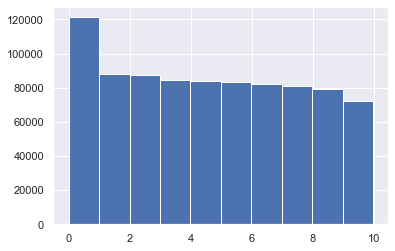

In [42]:
# random
env = Environment(stopTime=stopTime)
loadBalancer = LoadBalancerRandom(nServers=10, environment=env) #roundrobin
source = Source(arrivalsPerSecond, requestTypes, loadBalancer, env)
env.run(debug=False, showProgress=False)
waitingTimeCI(env)
pCancelledCI(env)

5.060997916622643
2.8742721867713823
mean:  5.060997916622643 95% ci for the waitingTime:  (5.054934562920845, 5.067061270324441) Number of samples:  863261
p(cancelled)  0.1520491338115765 95% ci for the p(cancelled)  (0.1512923497756109, 0.1528082529222668) Number of samples:  131285


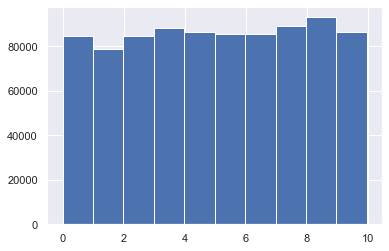

In [43]:
# shortest queue
env = Environment(stopTime=stopTime)
loadBalancer = LoadBalancerShortestQueue(nServers=10, environment=env) #roundrobin
source = Source(arrivalsPerSecond, requestTypes, loadBalancer, env)
env.run(debug=False, showProgress=False)
waitingTimeCI(env)
pCancelledCI(env)